### Random Walk

In [1]:
import matplotlib.pyplot as plt
import random

In [3]:
def generate_random_walk(length = 100, mu = 0, sig = 1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i == 0:
            ts.append(e)
        else:
            ts.append(ts[i - 1] + e)
    return ts
                

<function matplotlib.pyplot.show(close=None, block=None)>

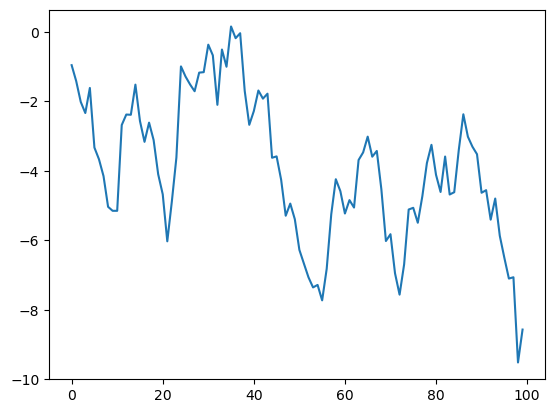

In [4]:
random.seed(10)
random_walk = generate_random_walk(100)
plt.plot(random_walk)
plt.show

### Trend

#### Linear Trend

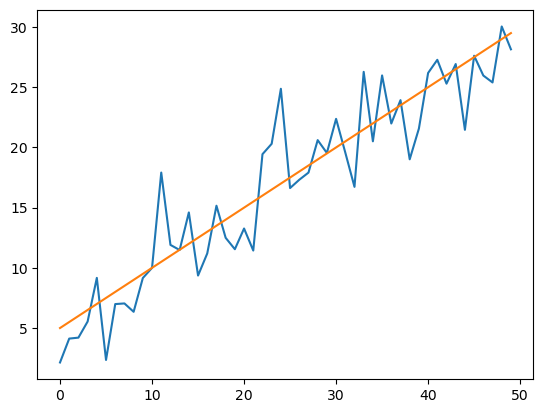

In [6]:
random.seed(10)
length = 50
A = 5
B = .5
C = 3
trend = [A + B * i for i in range(length)]
noise = [C * random.gauss(0,1) for _ in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

#### Non-Linear Trend

In [8]:
from math import log

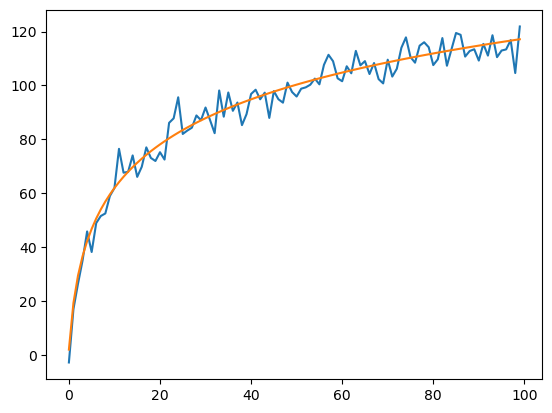

In [12]:
random.seed(10)
length = 100
A = 2
B = 25
C = 5
trend = [A + B * log(i) for i in range(1, length + 1)]
noise = [C * random.gauss(0,1) for _ in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

### Seasonality

In [13]:
# A periodic function is a function that repeats its values at regular intervals: 
# St+p = S
# The most common mathematical periodic functions are trigonometric functions: sin(x), cos(x)

In [14]:
# The forumla for a time series with seasonality:
# Tt = A + Bt + CSt + Et

In [15]:
from math import sin

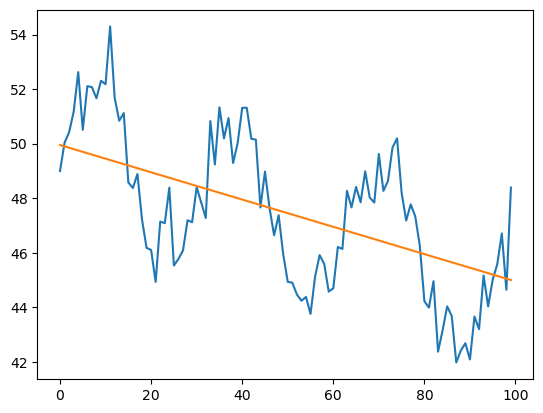

In [17]:
random.seed(10)
length = 100
A = 50
B = -.05
C = 1
S = 3
trend = [A + B * i for i in range(1, length + 1)]
seasons = [S * sin(i/5) for i in range(length)]
noise = [C * random.gauss(0,1) for _ in range(length)]
ts = [trend[i] + noise[i] + seasons[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

### Stationarity

In [18]:
# A stationary time series is characteristic does not depend on the point at which the 
# series is observed. A random walk is stationary. It does not matter when you observe it.

## Time Series common problems

In [19]:
# Time series analysis problem can be divided into:
## Forecasting
## Modeling
## Anomaly Detection

### Forecasting

In [21]:
# Forecating tries to find the most likely time series values in the future.
# As a rule, forecasting task does not imply an exact solution, but the suggestion 
# of a certain interval in which the time series future values will be located.
# Because every natural time series has a random component Et so it is imporrsible to predict 
# future value with 100% probability

### Modelling

In [22]:
# Modelling task implies the construction of a model that would describe a certain process
# over the observed time series. The main goal is to understand the nature and logical form
# of the process, which hides behind the time series

### Anomaly Detection

In [ ]:
# Anomaly detection is a method used to recognize exceptional patterns that do not 
# correspond to expected behaviour in time series.

## Classical Approaches

In [24]:
!pip install -q yfinance

### Autoregressive Model (AR)

In [25]:
# AR method:
# Tt = ao + a1Tt-1 + a2Tt-2 + anTt-n
# The noration AR(p) means that the autoregressive model uses p history lag to make a prediction

In [26]:
from statsmodels.tsa.ar_model import AutoReg

ModuleNotFoundError: No module named 'statsmodels'

In [27]:
!pip install -q statsmodels

In [28]:
from statsmodels.tsa.ar_model import AutoReg

In [42]:
import yfinance as yf
quotes = yf.download("META", start="2011-01-01", end="2021-01-01")

[*********************100%***********************]  1 of 1 completed


In [43]:
type(quotes)

pandas.core.frame.DataFrame

In [44]:
quotes.shape

(2170, 6)

In [45]:
quotes

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000
2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700
2020-12-29,276.950012,280.510010,276.279999,276.779999,276.779999,16383000


In [46]:
model = AutoReg(quotes['Close'], lags=2)

/Users/prakanan/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
model_fit = model.fit()

In [48]:
print(model_fit.params)

const       0.140215
Close.L1    0.930913
Close.L2    0.068906
dtype: float64


In [50]:
# FB tomorrow's Close price is calculates as:
# Fb(tomorrow price) = 0.140215 + 0.930913*Fb(today price) + 0.068906*Fb(yesterday price)

### Autoregressive integrated moving average model (ARIMA)

In [ ]:
# ARIMA model is the advanced form of AR model which includes the dependency between 
# an observation and a residual error from a moving average  moel applied to lagged 
# observation

In [53]:
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from_date = "2015-01-01"
to_date = "2020-10-01"
quotes = yf.download('META', start=from_date, end=to_date)

[*********************100%***********************]  1 of 1 completed


In [55]:
quotes.shape

(1447, 6)

In [57]:
quotes.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [58]:
closes = quotes['Close'].values

In [60]:
print(type(closes))
print(closes)

<class 'numpy.ndarray'>
[ 78.44999695  77.19000244  76.15000153 ... 256.82000732 261.79000854
 261.8999939 ]


In [61]:
train, test = closes[:-1], closes[-1]

In [62]:
model = ARIMA(train, order = (5, 2, 3))
results = model.fit()
forecast = results.forecast()

/Users/prakanan/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/prakanan/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [63]:
type(forecast)

numpy.ndarray

In [64]:
predicted = forecast[0]

In [65]:
print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

Predicted Price on 2020-10-01: 260.56$
Actual Price on 2020-10-01: 261.9$


### Seasonal autoregressive integrated mocing average (SARIMA)

In [67]:
# Extension of ARIMA that includes the impact of seasonality.
# One of the most advanced models from statistics and random process theory.

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance as yf
from_date = "2015-01-01"
to_date = "2020-10-01"
quotes = yf.download('META', start=from_date, end=to_date)

[*********************100%***********************]  1 of 1 completed


In [69]:
closes = quotes['Close'].values

In [70]:
train, test = closes[:-1], closes[-1]
model = SARIMAX(train, order = (3, 1, 1), seasonal_order = (0, 0, 0, 0))
results = model.fit(disp=0)
forecast = results.forecast()

In [71]:
predicted = forecast[0]

In [72]:
print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

Predicted Price on 2020-10-01: 261.3$
Actual Price on 2020-10-01: 261.9$


### Holt Winter's exponential smoothing (HWES)

In [ ]:
# It is a way to model and forecast a time series's behaviour. HWES is a way to model 
# 3 aspects of the time series:
    # An average of a typical value, a trend, and a seasonality
# HWES uses exponential smoothing to remember lots of data from the past and predict
# future values.So this method is suitable for time series with trend and seasonal components

In [75]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import yfinance as yf
from_date = "2015-01-01"
to_date = "2020-10-01"
quotes = yf.download('META', start=from_date, end=to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]
model = ExponentialSmoothing(train)
results = model.fit()
forecast = results.forecast()

[*********************100%***********************]  1 of 1 completed


In [76]:
predicted = forecast[0]
print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

Predicted Price on 2020-10-01: 261.48$
Actual Price on 2020-10-01: 261.9$


### Classical approaches: Pros and Cons 

In [77]:
# Linear methods like ARIMA, SARIMA, HWES are popular classical techniques for time series
# forecasting. But the traditional approcaches also have constraints:
    # focus on linear relationships and inability to find complex nonlinear ones
    # Fixed lag observations and incapacity to make feature pre-processing
    # Missing data are not supported
    # Working mostly with univariate time series
    # One step predictions: Many real-world problems require preictions with a long time
    # horizon

### Deep Learning

#### CNN

In [ ]:
# The ability of CNNs to detect and automatically extract features from the 
# input dataset can be applied to time series forecasting problems.
# Time-series can be handled like a one-dimensional image that a CNN model can analyze.
# The CNN model can learn a representation from an arbitrary extended input sequence
# suitable for the forecast problem.

#### RNN

In [ ]:
# Recurrent Neural Networks (RNN) like the Long Short-Term Memory networks (LSTM) add the
# explicit treatment of order betwen time-series data when learning a mapping function 
# from inputs to outputs. RNNs add native support for input data comprised of obsrvations
# sequences. MLPs or CNN do not offer this feature.

#### Important Python Libraries

In [79]:
#Pandas
#Numpy
#Matplotlib
#Statmodels
#Scikit-learn
#PyTorch